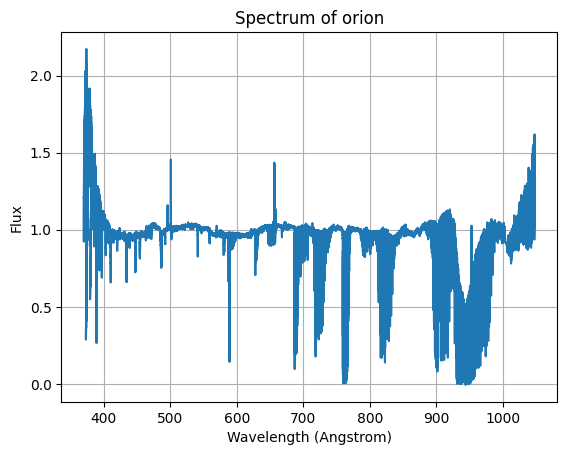

In [1]:
import pyvo as vo
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy.units import Quantity
from astropy.utils.data import download_file
from astropy.io import fits

# Target name
target_name = "orion"

# SSA service URL
service_url = "http://polarbase.irap.omp.eu/ssa_polarbase"

# Create SSA service object
ssa_service = vo.dal.SSAService(service_url)

pos = SkyCoord.from_name(target_name)
size = Quantity(0.5, unit="deg")

# Search for available datasets
ssa_results = ssa_service.search(pos=pos, diameter=size)

# # Select the first dataset (assuming it's the spectrum of Pollux)
dataset = ssa_results[0]

# Get the spectrum URL
spectrum_url  = dataset.getdataurl()


# Download the FITS file
downloaded_fits_file = download_file(spectrum_url, cache=True)


# Open the FITS file
with fits.open(downloaded_fits_file) as hdul:
    # hdul is a list of HDU (Header Data Unit) objects
    # HDU 0 is the primary HDU containing the main data
    primary_hdu = hdul[1]

    # Accessing header information
    header = primary_hdu.header

    # Accessing data
    data = primary_hdu.data

    column1_data = data.field(0)  # Assuming the first column is at index 0
    column2_data = data.field(1)  # Assuming the second column is at index 1

    # Plot the data
    plt.plot(column1_data, column2_data)
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux')
    plt.title(f"Spectrum of {target_name}")
    plt.grid(True)
    plt.show()